In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

from PIL import Image
import urllib
import json
import os
import matplotlib.font_manager as fm
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from highlight_text import fig_text

import ScraperFC as sfc
import traceback
import pandas as pd

import math



gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

teams = ['Fiorentina', 'Milan', 'Atalanta', 'Bologna', 'Cremonese', 'Empoli', 'Hellas Verona', 'Inter', 'Juventus', 'Lazio', 'Lecce', 'Monza', 'Roma',
        'Napoli', 'Salernitana', 'Sampdoria', 'Sassuolo', 'Spezia', 'Torino', 'Udinese', 'Genoa', 'Cagliari', 'Venezia', 'Benevento', 'Crotone', 'Parma', 'Brescia', 'Spal']

footId = [8535, 8564, 8524, 9857, 7801, 8534, 9876, 8636, 9885, 8543, 9888, 6504, 8686,
          9875, 6480, 9882, 7943, 9881, 9804, 8600, 10233, 8529, 7881, 6266, 9884, 10167, 9858, 8547]

footTeams = pd.DataFrame({'Squad': teams,
                   'footId': footId})

font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("../assets/stylesheets/soc_base.mplstyle")


C:\Users\fgron\AppData\Local\Temp\ipykernel_3428\928703683.py:50: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


In [ ]:
scraper = sfc.FBRef() # initialize the FBRef scraper
try:
    # scrape the table
    shooting_stats = scraper.scrape_stats(2023, league="Serie A", stat_category="shooting")
    #matches = scraper.scrape_matches(2023, league="Serie A")
except:
    """ Catch and print any exceptions. This allows us to still close
    the scraper below, even if an exception occurs.
    """
    traceback.print_exc()

""" It's important to close the scraper when you're done with it.
Otherwise, you'll have a bunch of webdrivers open and running in
the background.
"""
scraper.close()

shooting_df_A_2022_23 = shooting_stats[0]
squad = shooting_df_A_2022_23["Unnamed: 0_level_0"]
stats = shooting_df_A_2022_23["Standard"]
exp = shooting_df_A_2022_23["Expected"]
final_df = squad.join(stats)
final_df_1 = final_df[['Squad', 'G/SoT']]
final_df_1_sort = final_df_1.sort_values(by='G/SoT', ascending=False)
final_df_1_sort = final_df_1_sort.reset_index(drop=True)

In [9]:
final_1 = pd.merge(final_df_1_sort, footTeams, how = "left")
final_1.replace({
    "Squad":{
         'Fiorentina' : 'FIO',
         'Milan':'MIL',
         'Atalanta':'ATA',
         'Bologna':'BOL',
         'Cremonese':'CRE',
         'Empoli':'EMP',
         'Hellas Verona':'VER',
         'Inter':'INT',
         'Juventus':'JUV',
         'Lazio':'LAZ',
         'Lecce':'LEC',
         'Monza':'MON',
         'Roma':'ROM',
         'Napoli':'NAP',
         'Salernitana':'SAL',
         'Sampdoria':'SAM',
         'Sassuolo':'SAS',
         'Spezia':'SPE',
         'Torino':'TOR',
         'Udinese':'UDI',
         'Genoa':'GEN',
         'Cagliari':'CAG',
         'Venezia':'VEN',
         'Benevento':'BEN',
         'Crotone':'CRO',
         'Parma':'PAR',
         'Brescia':'BRE',
         'Spal':'SPA'
    }
}, inplace = True)

findfont: Font family ['DM Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.


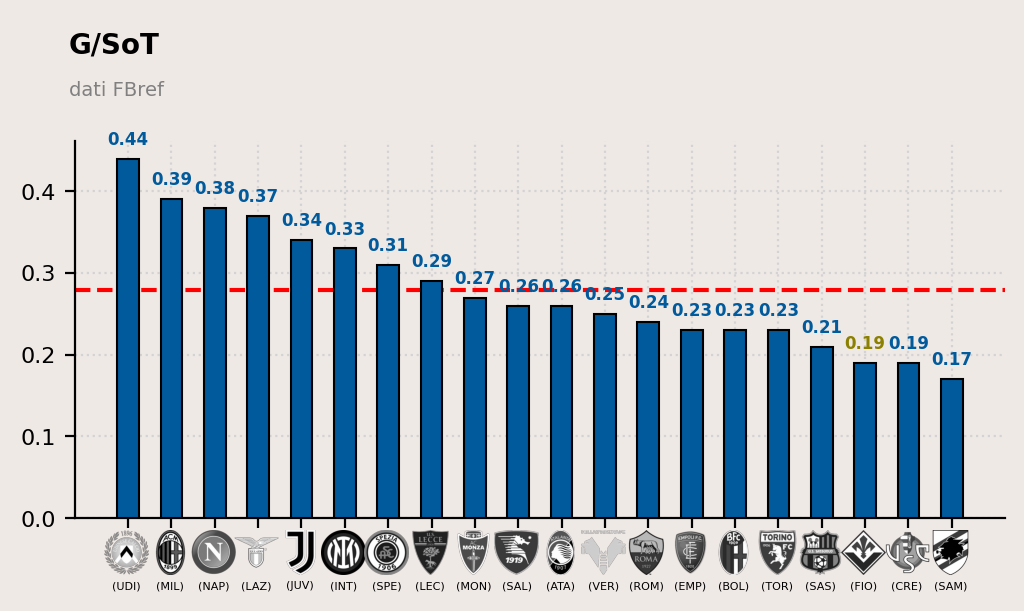

In [10]:
X_2223=final_1.index
GSot_2223 = final_1['G/SoT']
fiorentinaInd = "FIO"
GSot_2223_avg = GSot_2223.mean()
fig = plt.figure(figsize=(6, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Add spines
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)

# Add grid and axis labels
ax.grid(True, color = "lightgrey", ls = ":")

# We specify the width of the bar
width = 0.5

# G/SoT
ax.bar(
    X_2223, 
    GSot_2223,
    ec = "black", 
    lw = .75, 
    color = "#005a9b", 
    zorder = 3, 
    width = width,
    label = "Second ball"
)

ax.axhline(y=GSot_2223_avg, color='red', linestyle='--', label='average')

for index, y in enumerate(GSot_2223):
    colorT = "#005a9b"
    if (final_1.iloc[index,0]==fiorentinaInd):
        colorT = "#8B8000"
    ax.annotate(
        xy = (index, y),
        text = f"{y:.2f}",
        xytext = (0, 7),
        textcoords = "offset points",
        size = 6,
        color = colorT,
        ha = "center",
        va = "center",
        weight = "bold"
    )

xticks_ = ax.xaxis.set_ticks(
    ticks = X_2223,
    labels = []
    )

ax.tick_params(labelsize = 8)


# --- Axes transformations

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform

# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, team_id in enumerate(final_1["footId"]):
    ax_coords = DC_to_NFC([index - 1.1*width, -0.07])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.09, 0.09], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")

    logo_ax.annotate(
        xy =(0, 0),
        text = f"({final_1['Squad'].iloc[index]})",
        xytext = (8, -20),
        textcoords = "offset points",
        size = 4,
        ha = "center",
        va = "center"
    )

fig_text(
    x = 0.12, y = 1.1,
    s = "G/SoT",
    family = "DM Sans",
    weight = "bold",
    size = 10
)
fig_text(
    x = 0.12, y = 1,
    s = "dati FBref",
    family = "Karla",
    color = "grey",
    size = 7
)

plt.show()

In [11]:
fromYardsToMeters = 0.9144
final_df_2 = final_df[['Squad', 'SoT%', 'Dist']].copy()
final_df_2.loc[:, 'Dist'] = round(final_df_2['Dist'] * fromYardsToMeters,2)
final_2 = pd.merge(final_df_2, footTeams, how = "left")
final_2.replace({
    "Squad":{
         'Fiorentina' : 'FIO',
         'Milan':'MIL',
         'Atalanta':'ATA',
         'Bologna':'BOL',
         'Cremonese':'CRE',
         'Empoli':'EMP',
         'Hellas Verona':'VER',
         'Inter':'INT',
         'Juventus':'JUV',
         'Lazio':'LAZ',
         'Lecce':'LEC',
         'Monza':'MON',
         'Roma':'ROM',
         'Napoli':'NAP',
         'Salernitana':'SAL',
         'Sampdoria':'SAM',
         'Sassuolo':'SAS',
         'Spezia':'SPE',
         'Torino':'TOR',
         'Udinese':'UDI',
         'Genoa':'GEN',
         'Cagliari':'CAG',
         'Venezia':'VEN',
         'Benevento':'BEN',
         'Crotone':'CRO',
         'Parma':'PAR',
         'Brescia':'BRE',
         'Spal':'SPA'
    }
}, inplace = True)
dataset = final_2

C:\Users\fgron\AppData\Local\Temp\ipykernel_20288\1898719018.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)


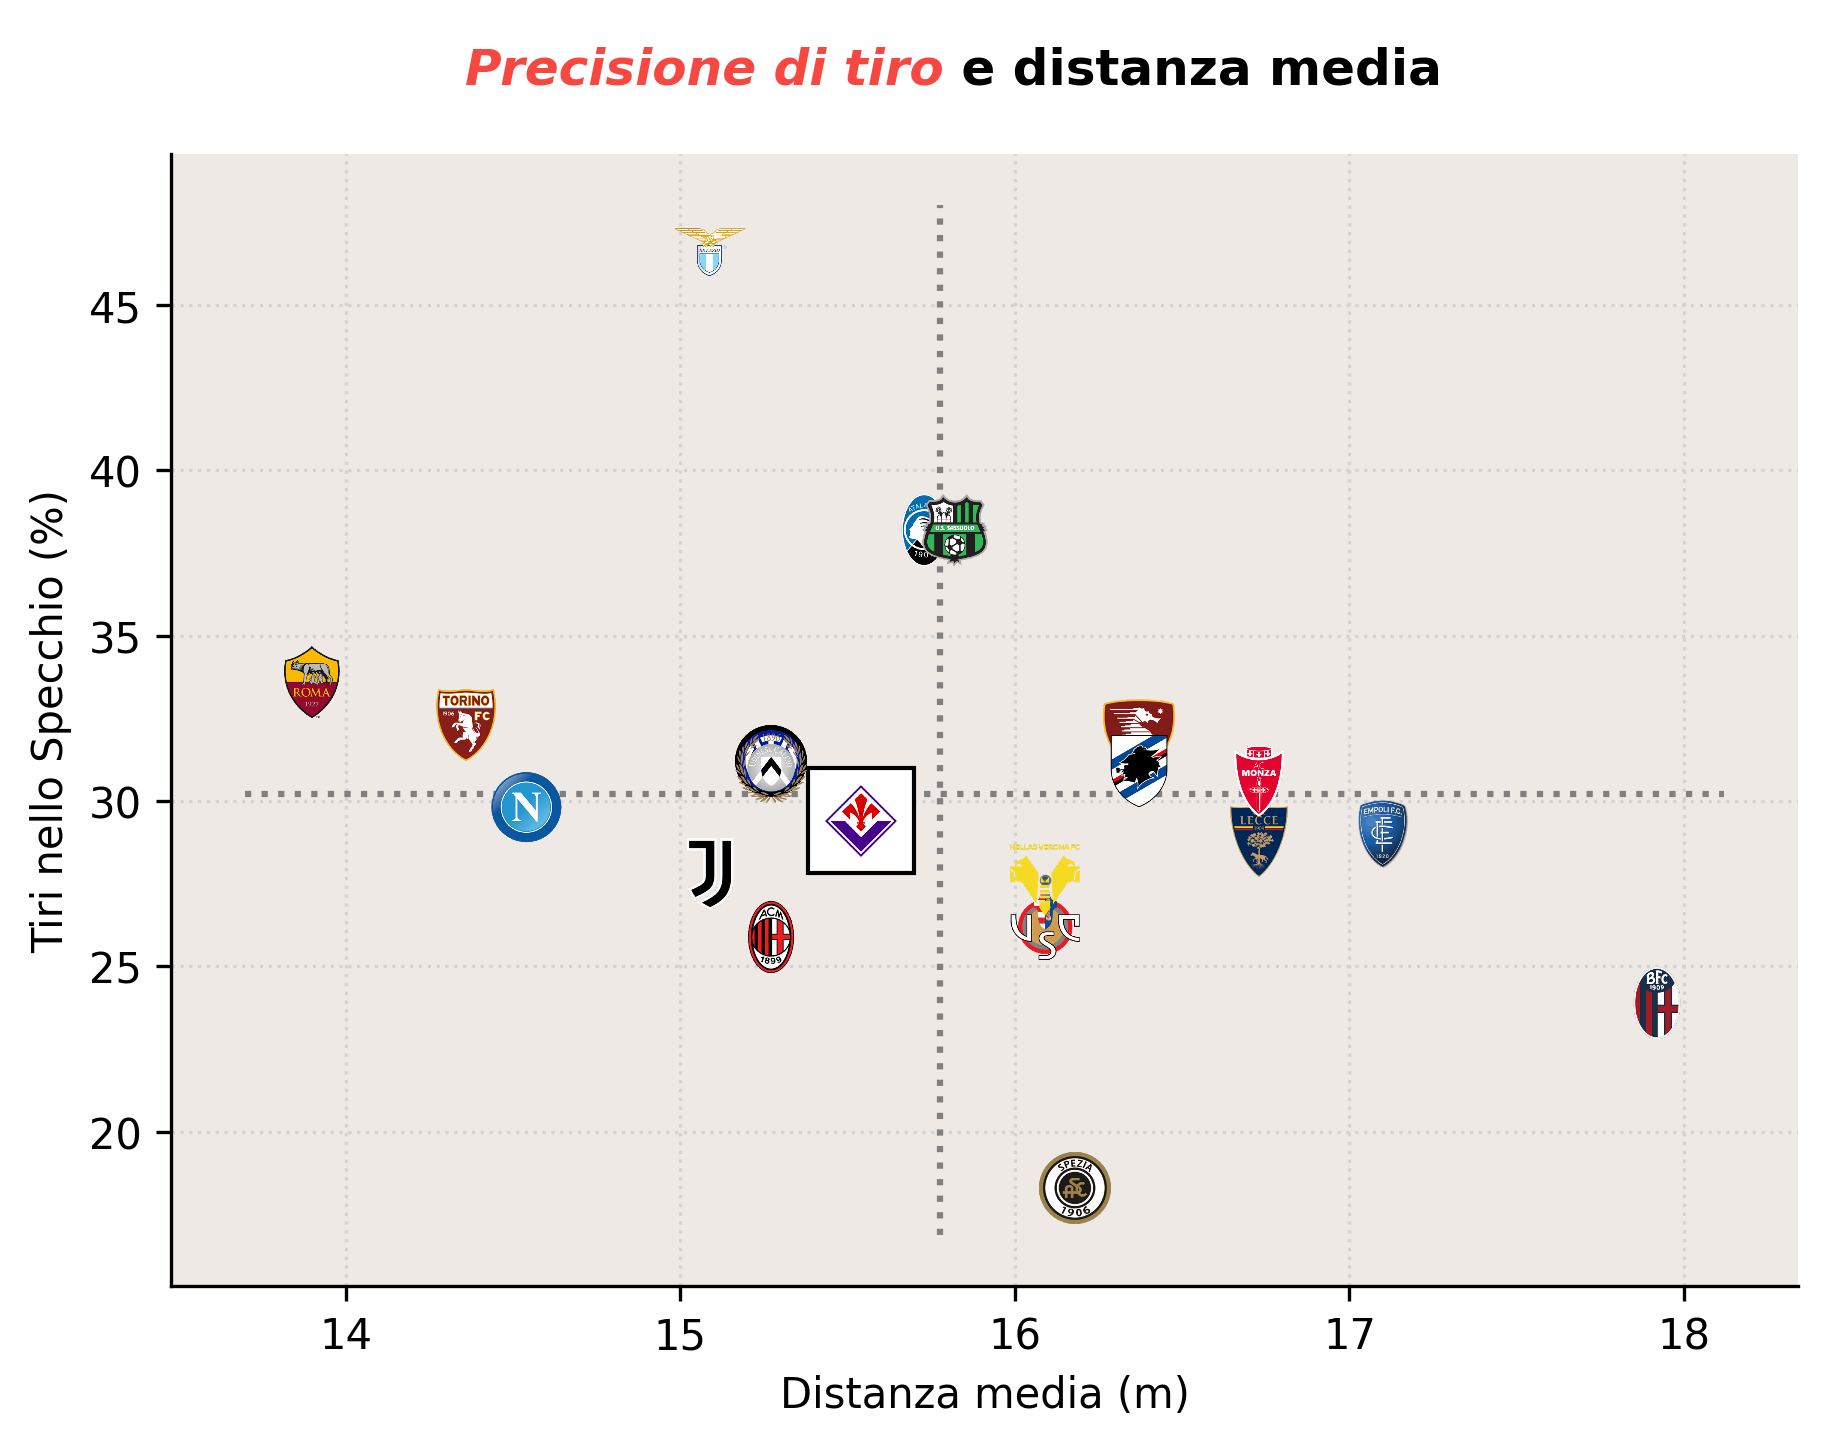

In [12]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)

fig = plt.figure(figsize = (7,5), dpi = 300)
ax = plt.subplot(facecolor = "#EFE9E6")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    dataset["Dist"], 
    dataset["SoT%"], 
    s = 3, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
)
ax.plot(
    [dataset["Dist"].median(), dataset["Dist"].median()],
    [ax.get_ylim()[0], ax.get_ylim()[1]], 
    ls = ":",
    color = "gray",
    zorder = 2
)
ax.plot(
    [ax.get_xlim()[0], ax.get_xlim()[1]],
    [dataset["SoT%"].median(), dataset["SoT%"].median()], 
    ls = ":",
    color = "gray",
    zorder = 2
)
ax.grid(True, ls = ":", color = "lightgray")

squadra = "FIO"
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, name in enumerate(dataset["Squad"]):
    X = dataset["Dist"].iloc[index]
    Y = dataset["SoT%"].iloc[index]
    y_pos = -9
    x_pos = 0
    path = fotmob_url + str(dataset["footId"].iloc[index]) + ".png"
    frame = False
    if (name == squadra):
        frame = True
    ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
    ax.add_artist(ab)

ax.set_ylabel("Tiri nello Specchio (%)")
ax.set_xlabel("Distanza media (m)")

fig_text(
        x = 0.73, y = 0.92, 
        s = "<Precisione di tiro> e distanza media",
        highlight_textprops=[{"color":"#F64740", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "black", weight = "bold"
)
subTitle =  ""
fig_text(
	    x = 0.87, y = .94, 
        s = subTitle,
	    va = "bottom", ha = "right",
	    fontsize = 7, color = "#4E616C",
)

filename = "../figures/PercentualeTiro_e_distanza_SerieA_22_23.png"
plt.savefig(
	    filename,
	    dpi = 600,
	    facecolor = "none",
	    bbox_inches="tight",
        edgecolor="none",
	    transparent = False
    )

# np: G-xG

In [ ]:
final_exp = squad.join(exp)
final_2 = pd.merge(final_exp, footTeams, how = "left")
final_2.replace({
    "Squad":{
         'Fiorentina' : 'FIO',
         'Milan':'MIL',
         'Atalanta':'ATA',
         'Bologna':'BOL',
         'Cremonese':'CRE',
         'Empoli':'EMP',
         'Hellas Verona':'VER',
         'Inter':'INT',
         'Juventus':'JUV',
         'Lazio':'LAZ',
         'Lecce':'LEC',
         'Monza':'MON',
         'Roma':'ROM',
         'Napoli':'NAP',
         'Salernitana':'SAL',
         'Sampdoria':'SAM',
         'Sassuolo':'SAS',
         'Spezia':'SPE',
         'Torino':'TOR',
         'Udinese':'UDI',
         'Genoa':'GEN',
         'Cagliari':'CAG',
         'Venezia':'VEN',
         'Benevento':'BEN',
         'Crotone':'CRO',
         'Parma':'PAR',
         'Brescia':'BRE',
         'Spal':'SPA'
    }
}, inplace = True)
dataset = final_2.sort_values(by='np:G-xG', ascending=True).reset_index(drop=True)

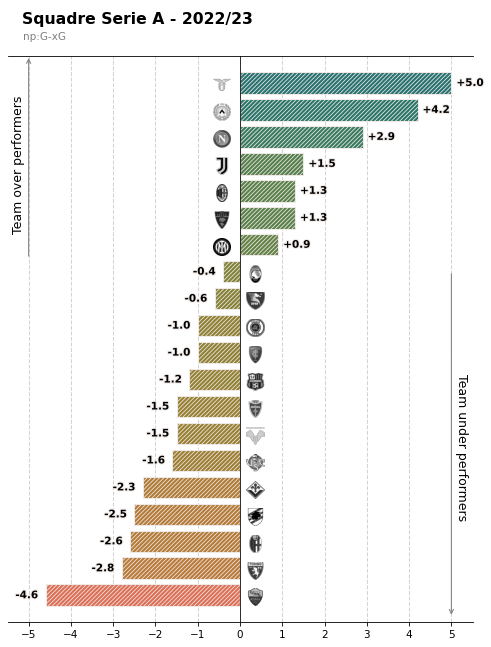

In [26]:
def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax


fig = plt.figure(figsize=(8,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(dataset['np:G-xG'].min()), dataset['np:G-xG'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, dataset.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.set_xlabel('(PSxG-GA)/PSxG', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=dataset['np:G-xG'].min(),vmax=dataset['np:G-xG'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    dataset.index, dataset['np:G-xG'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(dataset['np:G-xG'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

for index, x in enumerate(dataset['np:G-xG']):
    if x < 0:
        sign_offset = -1
        offset_logo = .15
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .65
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*18,0),
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

    # -- Add the logo
    team_id = dataset['footId'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, True)

    # -- Figure title and arrows --------------------------------
position_negative = dataset[dataset['np:G-xG'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='Squadre sovra-performanti',
    rotation=90,
    xytext=(-10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='Squadre sotto-performanti',
    rotation=-90,
    xytext=(10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)

textStr = 'Squadre Serie A - 2022/23'
fig_text(
    x = 0.15, y = .92, 
    s = textStr,
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'black', font = 'DM Sans', weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.9, 
    s = 'np:G-xG',
    va = 'bottom', ha = 'left',
    fontsize = 10, color = 'gray'
)

filenameStr = "../figures/squadre_serieA_2022_23_xg_xga.png"
plt.savefig(
	filenameStr,
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

## Serie A 2021-22 - Giornata 9

# xGOT - xG

In [64]:
xg_21_22_9_df = pd.read_csv("../data/SerieA_21_22_match_shots_9.csv", index_col="Ind")
df = xg_21_22_9_df[['team_id', 'player_id', 'player_name', 'event_type', 'x', 'y', 'expected_goals', 'expected_goals_on_target']]
df.loc[:, 'SoT'] = 0
df.loc[xg_21_22_9_df['is_on_target'] == True, 'SoT'] = 1
df.loc[:, 'shot'] = 1
df.loc[xg_21_22_9_df['is_own_goal'] == True, 'shot'] = 0
df.loc[:, 'goal'] = 0 
df.loc[xg_21_22_9_df['event_type'] == 'Goal', 'goal'] = 1
df = df.groupby(['team_id'])['goal', 'expected_goals', 'expected_goals_on_target','shot', 'SoT'].sum().reset_index()
df = df.rename(columns={'team_id':'footId','expected_goals':'xG', 'expected_goals_on_target':'xGOT'})
df.loc[:, 'xGOT/SoT'] = round(df.loc[:, 'xGOT'] / df.loc[:, 'SoT'],2)
df.loc[:, 'xGOT-xG'] = round(df.loc[:, 'xGOT'] - df.loc[:, 'xG'],2)
df.loc[:, 'goal-xGOT'] = round(df.loc[:, 'goal'] - df.loc[:, 'xGOT'],2)

final_1 = pd.merge(df, footTeams, how = "left")
final_1.replace({
    "Squad":{
         'Fiorentina' : 'FIO',
         'Milan':'MIL',
         'Atalanta':'ATA',
         'Bologna':'BOL',
         'Cremonese':'CRE',
         'Empoli':'EMP',
         'Hellas Verona':'VER',
         'Inter':'INT',
         'Juventus':'JUV',
         'Lazio':'LAZ',
         'Lecce':'LEC',
         'Monza':'MON',
         'Roma':'ROM',
         'Napoli':'NAP',
         'Salernitana':'SAL',
         'Sampdoria':'SAM',
         'Sassuolo':'SAS',
         'Spezia':'SPE',
         'Torino':'TOR',
         'Udinese':'UDI',
         'Genoa':'GEN',
         'Cagliari':'CAG',
         'Venezia':'VEN',
         'Benevento':'BEN',
         'Crotone':'CRO',
         'Parma':'PAR',
         'Brescia':'BRE',
         'Spal':'SPA'
    }
}, inplace = True)
final_1 = final_1.rename(columns={'footId':'team_id','Squad':'team_name'})
final_1 = final_1.sort_values(by='xG', ascending=True).reset_index(drop=True)

C:\Users\fgron\AppData\Local\Temp\ipykernel_3428\1646877217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'SoT'] = 0
C:\Users\fgron\AppData\Local\Temp\ipykernel_3428\1646877217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'shot'] = 1
C:\Users\fgron\AppData\Local\Temp\ipykernel_3428\1646877217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [65]:
colors = [
    '#efe9e6',
    '#e9e1dd',
    '#e3dad3',
    '#dcd3c9',
    '#d4ccc0',
    '#ccc6b7',
    '#c3bfae',
    '#bab9a6',
    '#b0b39e',
    '#a6ad96',
    '#9ba790',
    '#90a18a',
    '#849b84',
    '#789680',
    '#6c907c',
    '#608a79',
    '#538476',
    '#467e74',
    '#387872',
    '#287271',
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

C:\Users\fgron\AppData\Local\Temp\ipykernel_3428\405490639.py:24: UserWarning: Trying to register the cmap 'SOC' which already exists.
  cm.register_cmap(name='SOC', cmap=soc_cm)


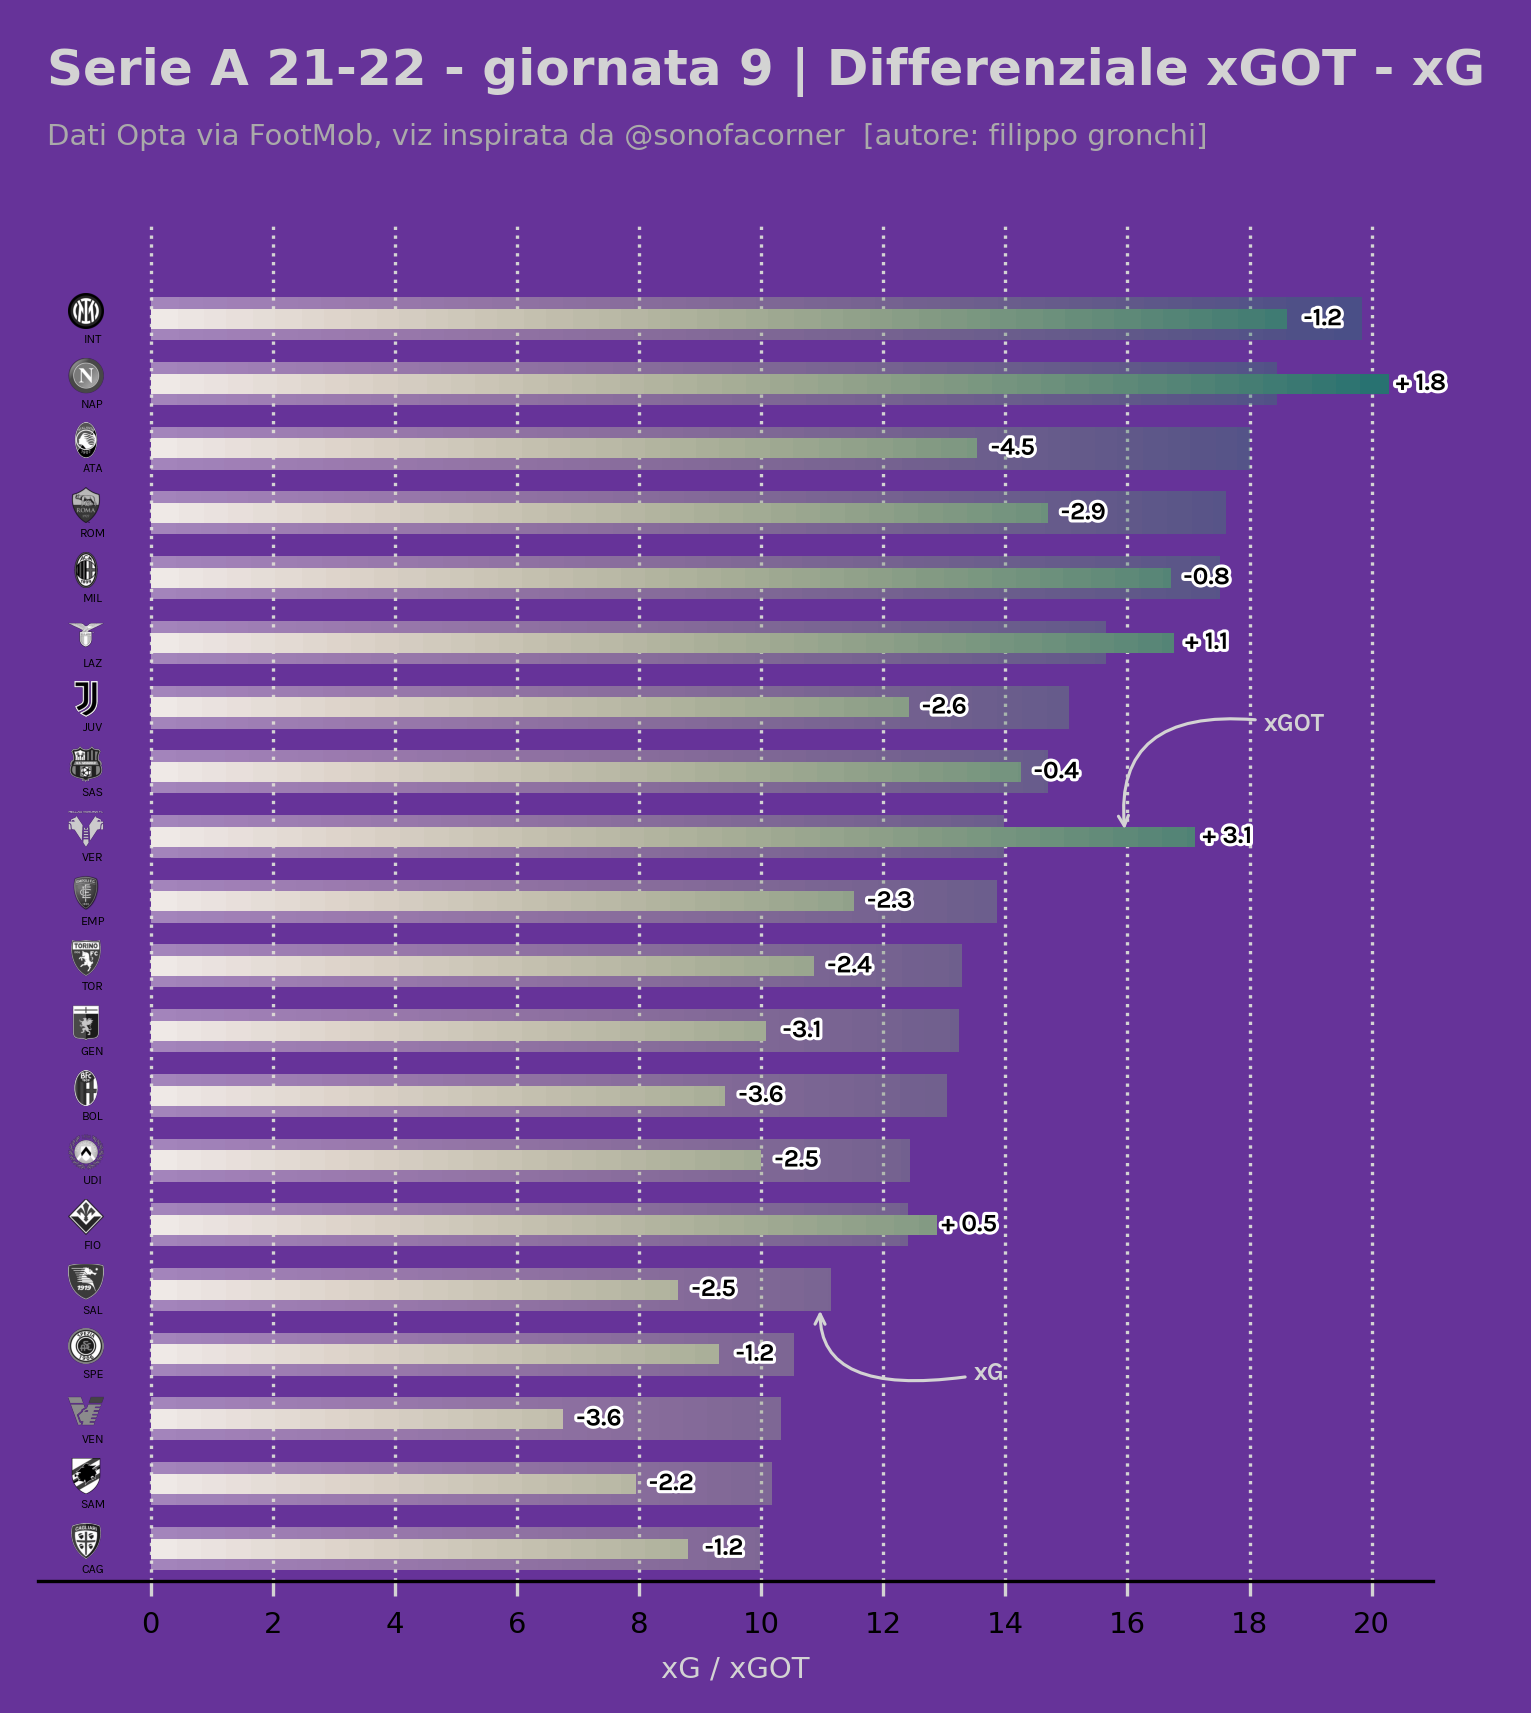

In [66]:
df = final_1
fig = plt.figure(figsize=(6,6), dpi=300, facecolor = "#663399")
ax = plt.subplot(111, facecolor = "#663399")

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_label_text('xG / xGOT', size=7, color='lightgrey')
ax.tick_params(labelsize=7, color='lightgrey')
ax.grid(axis='x', color='lightgrey', ls=':')
# xG
bars_ = ax.barh(df.index, df['xG'], height=0.65)
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df['xG']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC', alpha=0.45
    )
# xGOT
bars_ = ax.barh(df.index, df['xGOT'], height=0.3)
lim = ax.get_xlim()+ax.get_ylim()
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df['xGOT']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC'
    )

ax.set_xlim(-1.85,21)
ax.set_ylim(-.5,20.5)
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for y in df.index:
    ax_coords = DC_to_NFC((-1.35,y-.15))
    team_id = df['team_id'].iloc[y]
    team_name = df['team_name'].iloc[y].replace(' ', '\n')
    diff_xg = df['xGOT-xG'].iloc[y]
    xGOT = df['xGOT'].iloc[y]
    if diff_xg > 0:
        text_sign = '+'
    else:
        text_sign = ''
    ax_size = 0.02
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id}.png")).convert('LA')
    image_ax.imshow(player_face)
    image_ax.axis("off")
    ax.annotate(
        xy=(-.95, y - .32),
        text=team_name,
        size=3,
        ha='center',
        va='center'
    )
    text_ = ax.annotate(
        xy=(xGOT, y),
        xytext=(8,0),
        text=f'{text_sign} {diff_xg:.1f}',
        size=6,
        ha='center',
        va='center',
        textcoords='offset points',
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )


text_ = ax.annotate(
    xy=(16, 10.8),
    xytext=(40,30),
    text='xGOT',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    color='lightgrey',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color='lightgrey', linewidth=0.75,
            connectionstyle="angle3,angleA=-10,angleB=100"
    )
)

text_ = ax.annotate(
    xy=(11, 4),
    xytext=(40,-20),
    text='xG',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    color='lightgrey',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color='lightgrey', linewidth=0.75,
            connectionstyle="angle3,angleA=10,angleB=-100"
    )
)


fig_text(
    x = 0.13, y = .95, 
    s = "Serie A 21-22 - giornata 9 | Differenziale xGOT - xG",
    va = "bottom", ha = "left",
    fontsize = 12, color='lightgrey', font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.13, y = .92, 
    s = "Dati Opta via FootMob, viz inspirata da @sonofacorner  [autore: filippo gronchi]",
	va = "bottom", ha = "left",
	fontsize = 7, color = "#aaaaaa", font = "Karla"
)

plt.savefig(
	"../figures/12112022_serie_a_21_22_stage9_xg_xgot.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

# xG vs Shots

C:\Users\fgron\AppData\Local\Temp\ipykernel_3428\3730646511.py:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)


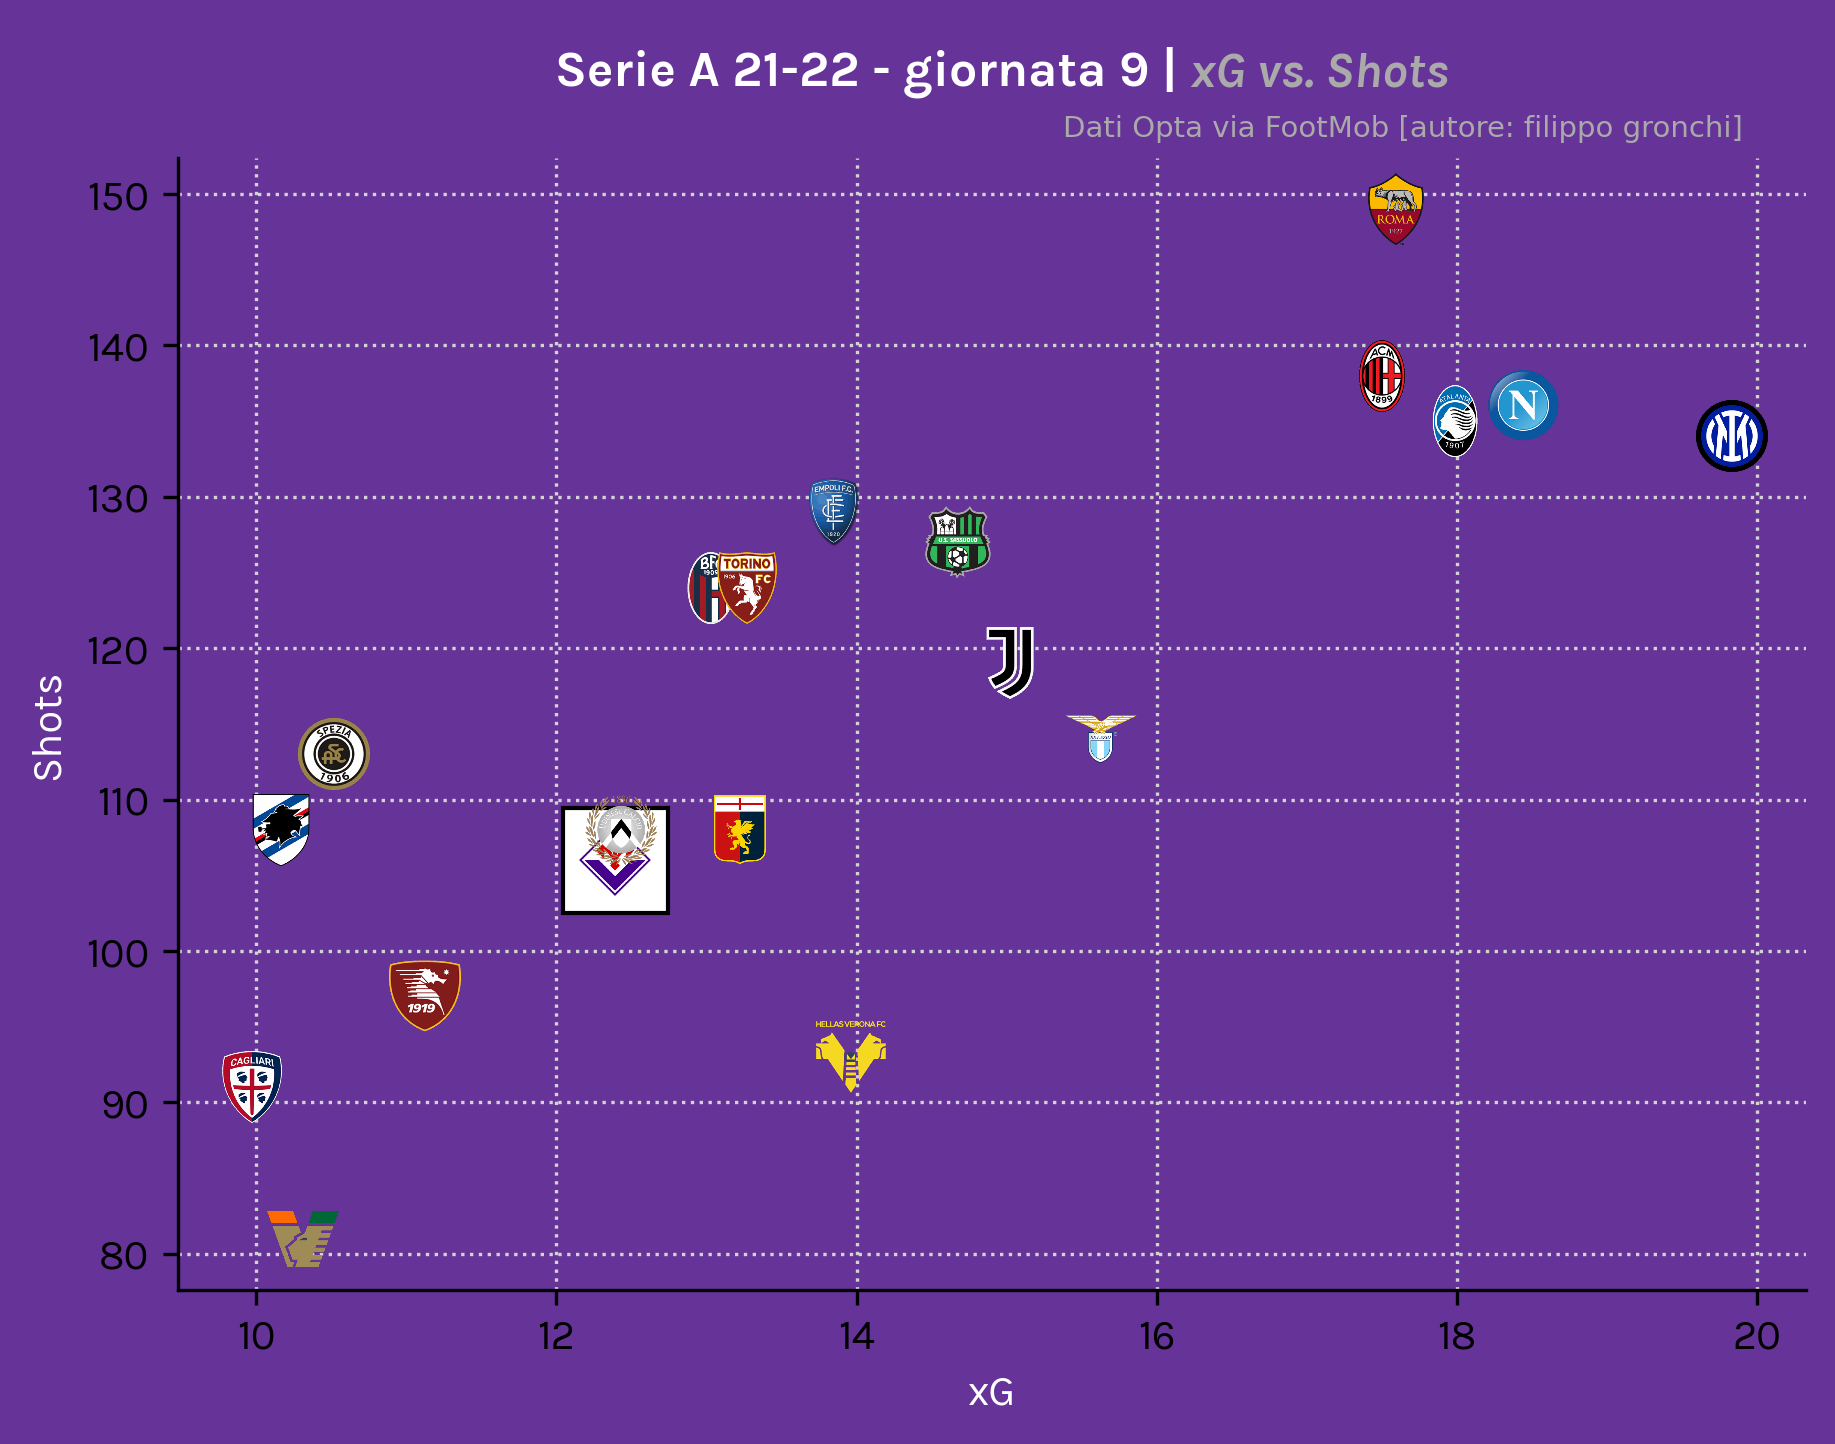

In [67]:
dataset = final_1
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)

fig = plt.figure(figsize = (7,5), dpi = 300, facecolor = "#663399")
ax = plt.subplot(facecolor = "#663399")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    dataset["xG"], 
    dataset["shot"], 
    s = 3, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
)
#ax.plot(
#    [dataset["xG"].median(), dataset["xG"].median()],
#    [ax.get_ylim()[0], ax.get_ylim()[1]], 
#    ls = ":",
#    color = "gray",
#    zorder = 2
#)
#ax.plot(
#    [ax.get_xlim()[0], ax.get_xlim()[1]],
#    [dataset["shot"].median(), dataset["shot"].median()], 
#    ls = ":",
#    color = "gray",
#    zorder = 2
#)
ax.grid(True, ls = ":", color = "lightgray")

squadra = "FIO"
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, name in enumerate(dataset["team_name"]):
    X = dataset["xG"].iloc[index]
    Y = dataset["shot"].iloc[index]
    y_pos = -9
    x_pos = 0
    path = fotmob_url + str(dataset["team_id"].iloc[index]) + ".png"
    frame = False
    if (name == squadra):
        frame = True
    ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
    ax.add_artist(ab)

ax.set_ylabel("Shots", color="white")
ax.set_xlabel("xG", color="white")

fig_text(
        x = 0.73, y = 0.92, 
        s = "Serie A 21-22 - giornata 9 | <xG vs. Shots>",
        highlight_textprops=[{"color":"#aaaaaa", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "white", weight = "bold"
)
subTitle =  "Dati Opta via FootMob [autore: filippo gronchi]"
fig_text(
	    x = 0.87, y = .89, 
        s = subTitle,
	    va = "bottom", ha = "right",
	    fontsize = 7, color = "#aaaaaa",
)

filename = "../figures/12112022_serie_a_21_22_stage9_shots_xg.png"
plt.savefig(
	    filename,
	    dpi = 600,
	    facecolor = "none",
	    bbox_inches="tight",
        edgecolor="none",
	    transparent = False
    )

# xGOT vs Shots On Target

C:\Users\fgron\AppData\Local\Temp\ipykernel_3428\1200314895.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)


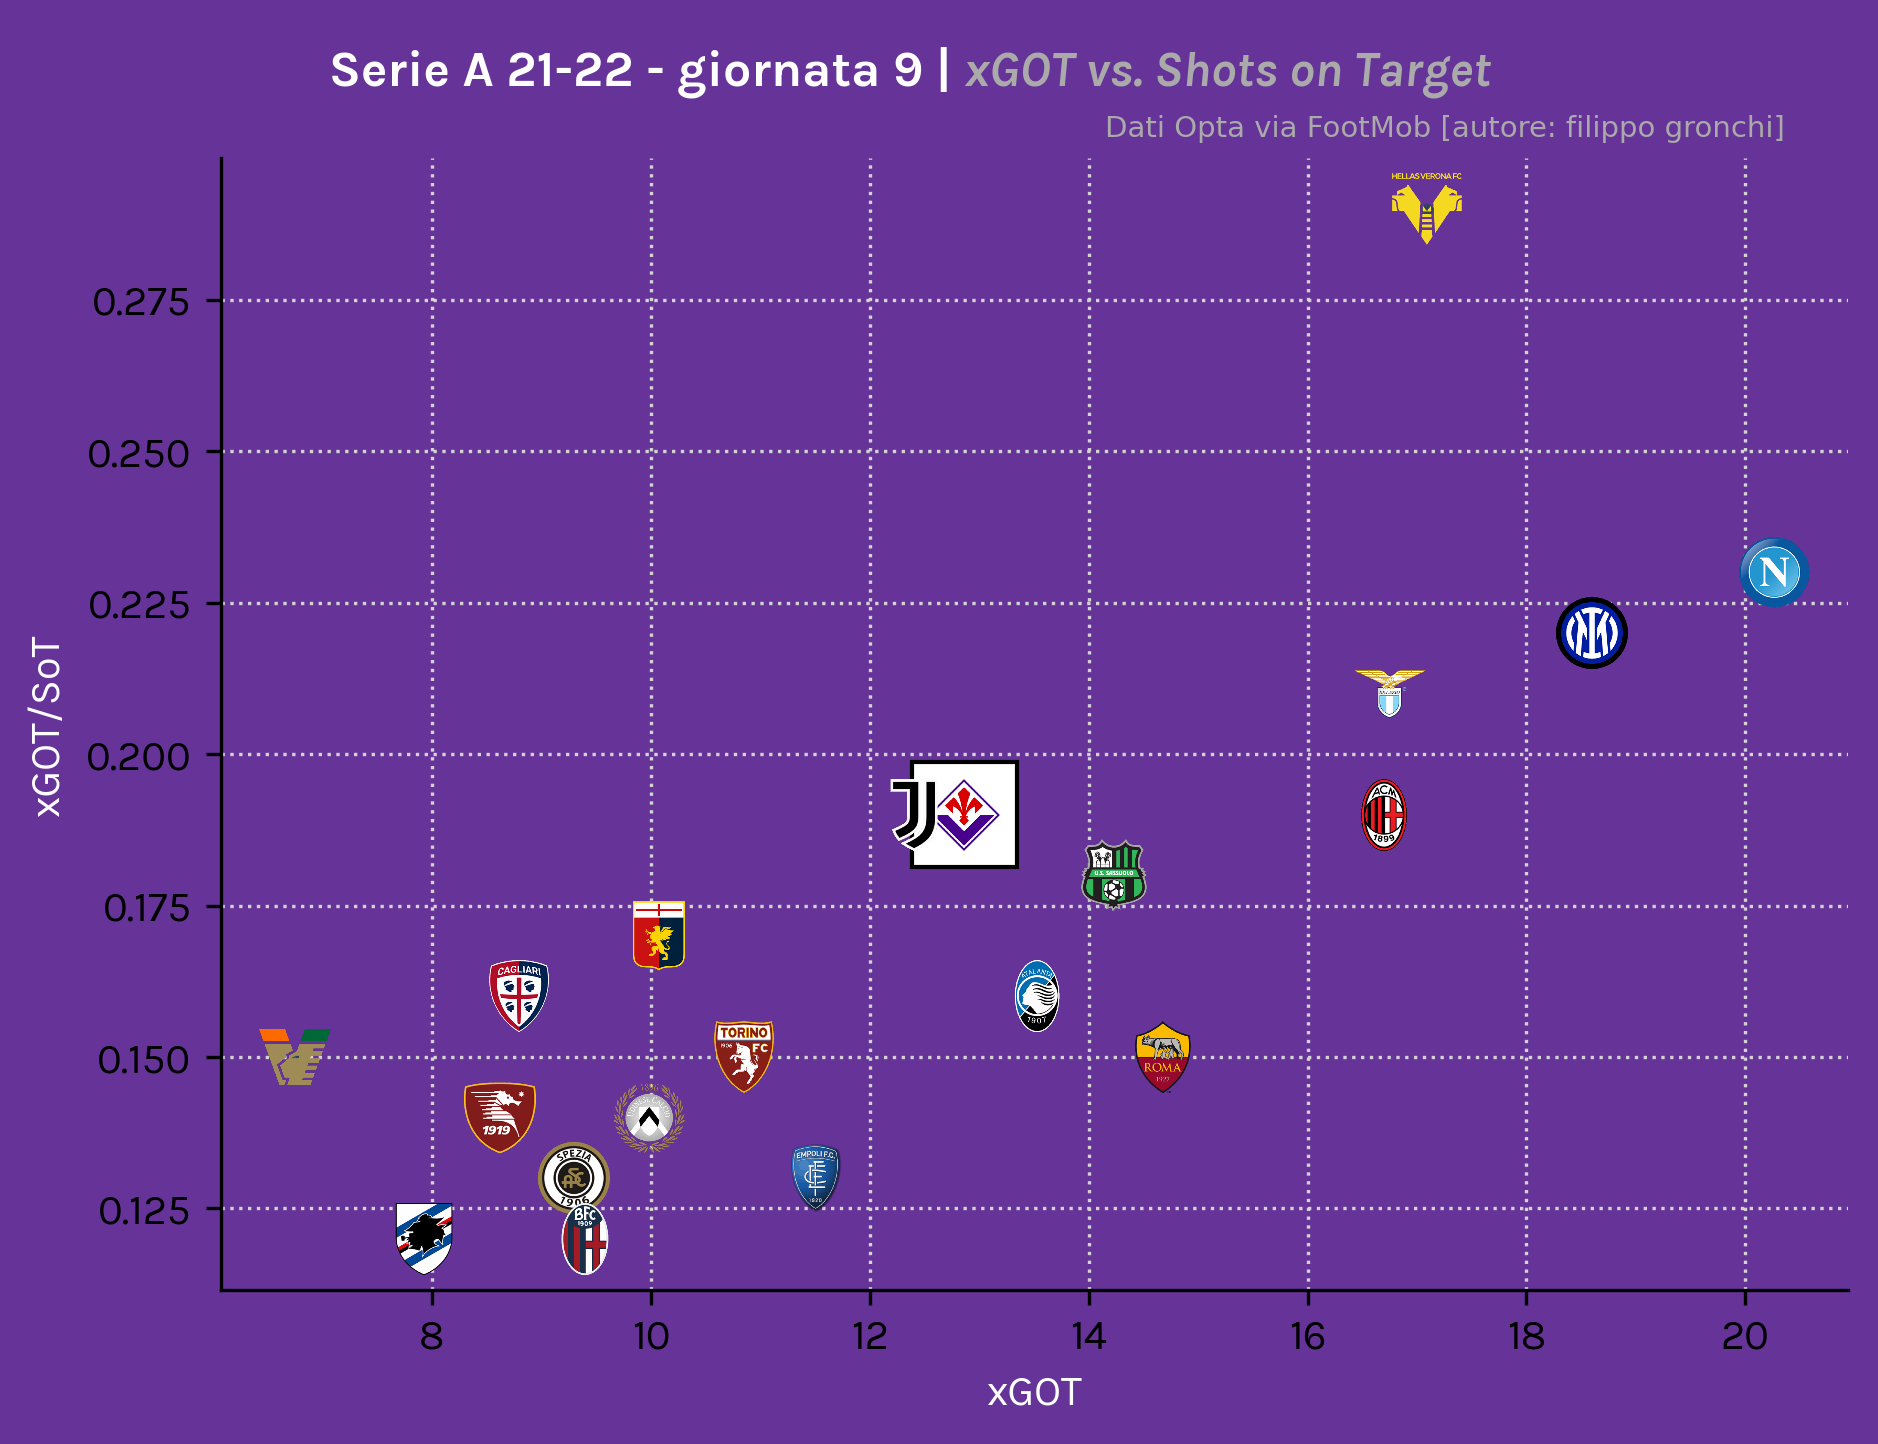

In [68]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.09, alpha = 1)

fig = plt.figure(figsize = (7,5), dpi = 300, facecolor = "#663399")
ax = plt.subplot(facecolor = "#663399")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(
    dataset["xGOT"], #xG
    dataset["xGOT/SoT"], #shot
    s = 3, 
    alpha = 0.75, 
    color = "#264653",
    zorder = 3
)
#ax.plot(
#    [dataset["xG"].median(), dataset["xG"].median()],
#    [ax.get_ylim()[0], ax.get_ylim()[1]], 
#    ls = ":",
#    color = "gray",
#    zorder = 2
#)
#ax.plot(
#    [ax.get_xlim()[0], ax.get_xlim()[1]],
#    [dataset["shot"].median(), dataset["shot"].median()], 
#    ls = ":",
#    color = "gray",
#    zorder = 2
#)
ax.grid(True, ls = ":", color = "lightgray")

squadra = "FIO"
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"
for index, name in enumerate(dataset["team_name"]):
    X = dataset["xGOT"].iloc[index]
    Y = dataset["xGOT/SoT"].iloc[index]
    y_pos = -9
    x_pos = 0
    path = fotmob_url + str(dataset["team_id"].iloc[index]) + ".png"
    frame = False
    if (name == squadra):
        frame = True
    ab = AnnotationBbox(getImage(path), (X, Y), frameon=frame)
    ax.add_artist(ab)

ax.set_ylabel("xGOT/SoT", color="white")
ax.set_xlabel("xGOT", color="white")

fig_text(
        x = 0.73, y = 0.92, 
        s = "Serie A 21-22 - giornata 9 | <xGOT vs. Shots on Target>",
        highlight_textprops=[{"color":"#aaaaaa", "style":"italic"}],
        va = "bottom", ha = "right",
        fontsize = 12, color = "white", weight = "bold"
)
subTitle =  "Dati Opta via FootMob [autore: filippo gronchi]"
fig_text(
	    x = 0.87, y = .89, 
        s = subTitle,
	    va = "bottom", ha = "right",
	    fontsize = 7, color = "#aaaaaa",
)

filename = "../figures/12112022_serie_a_21_22_stage9_xgot_sot.png"
plt.savefig(
	    filename,
	    dpi = 600,
	    facecolor = "none",
	    bbox_inches="tight",
        edgecolor="none",
	    transparent = False
    )

# Goal scored - xGOT

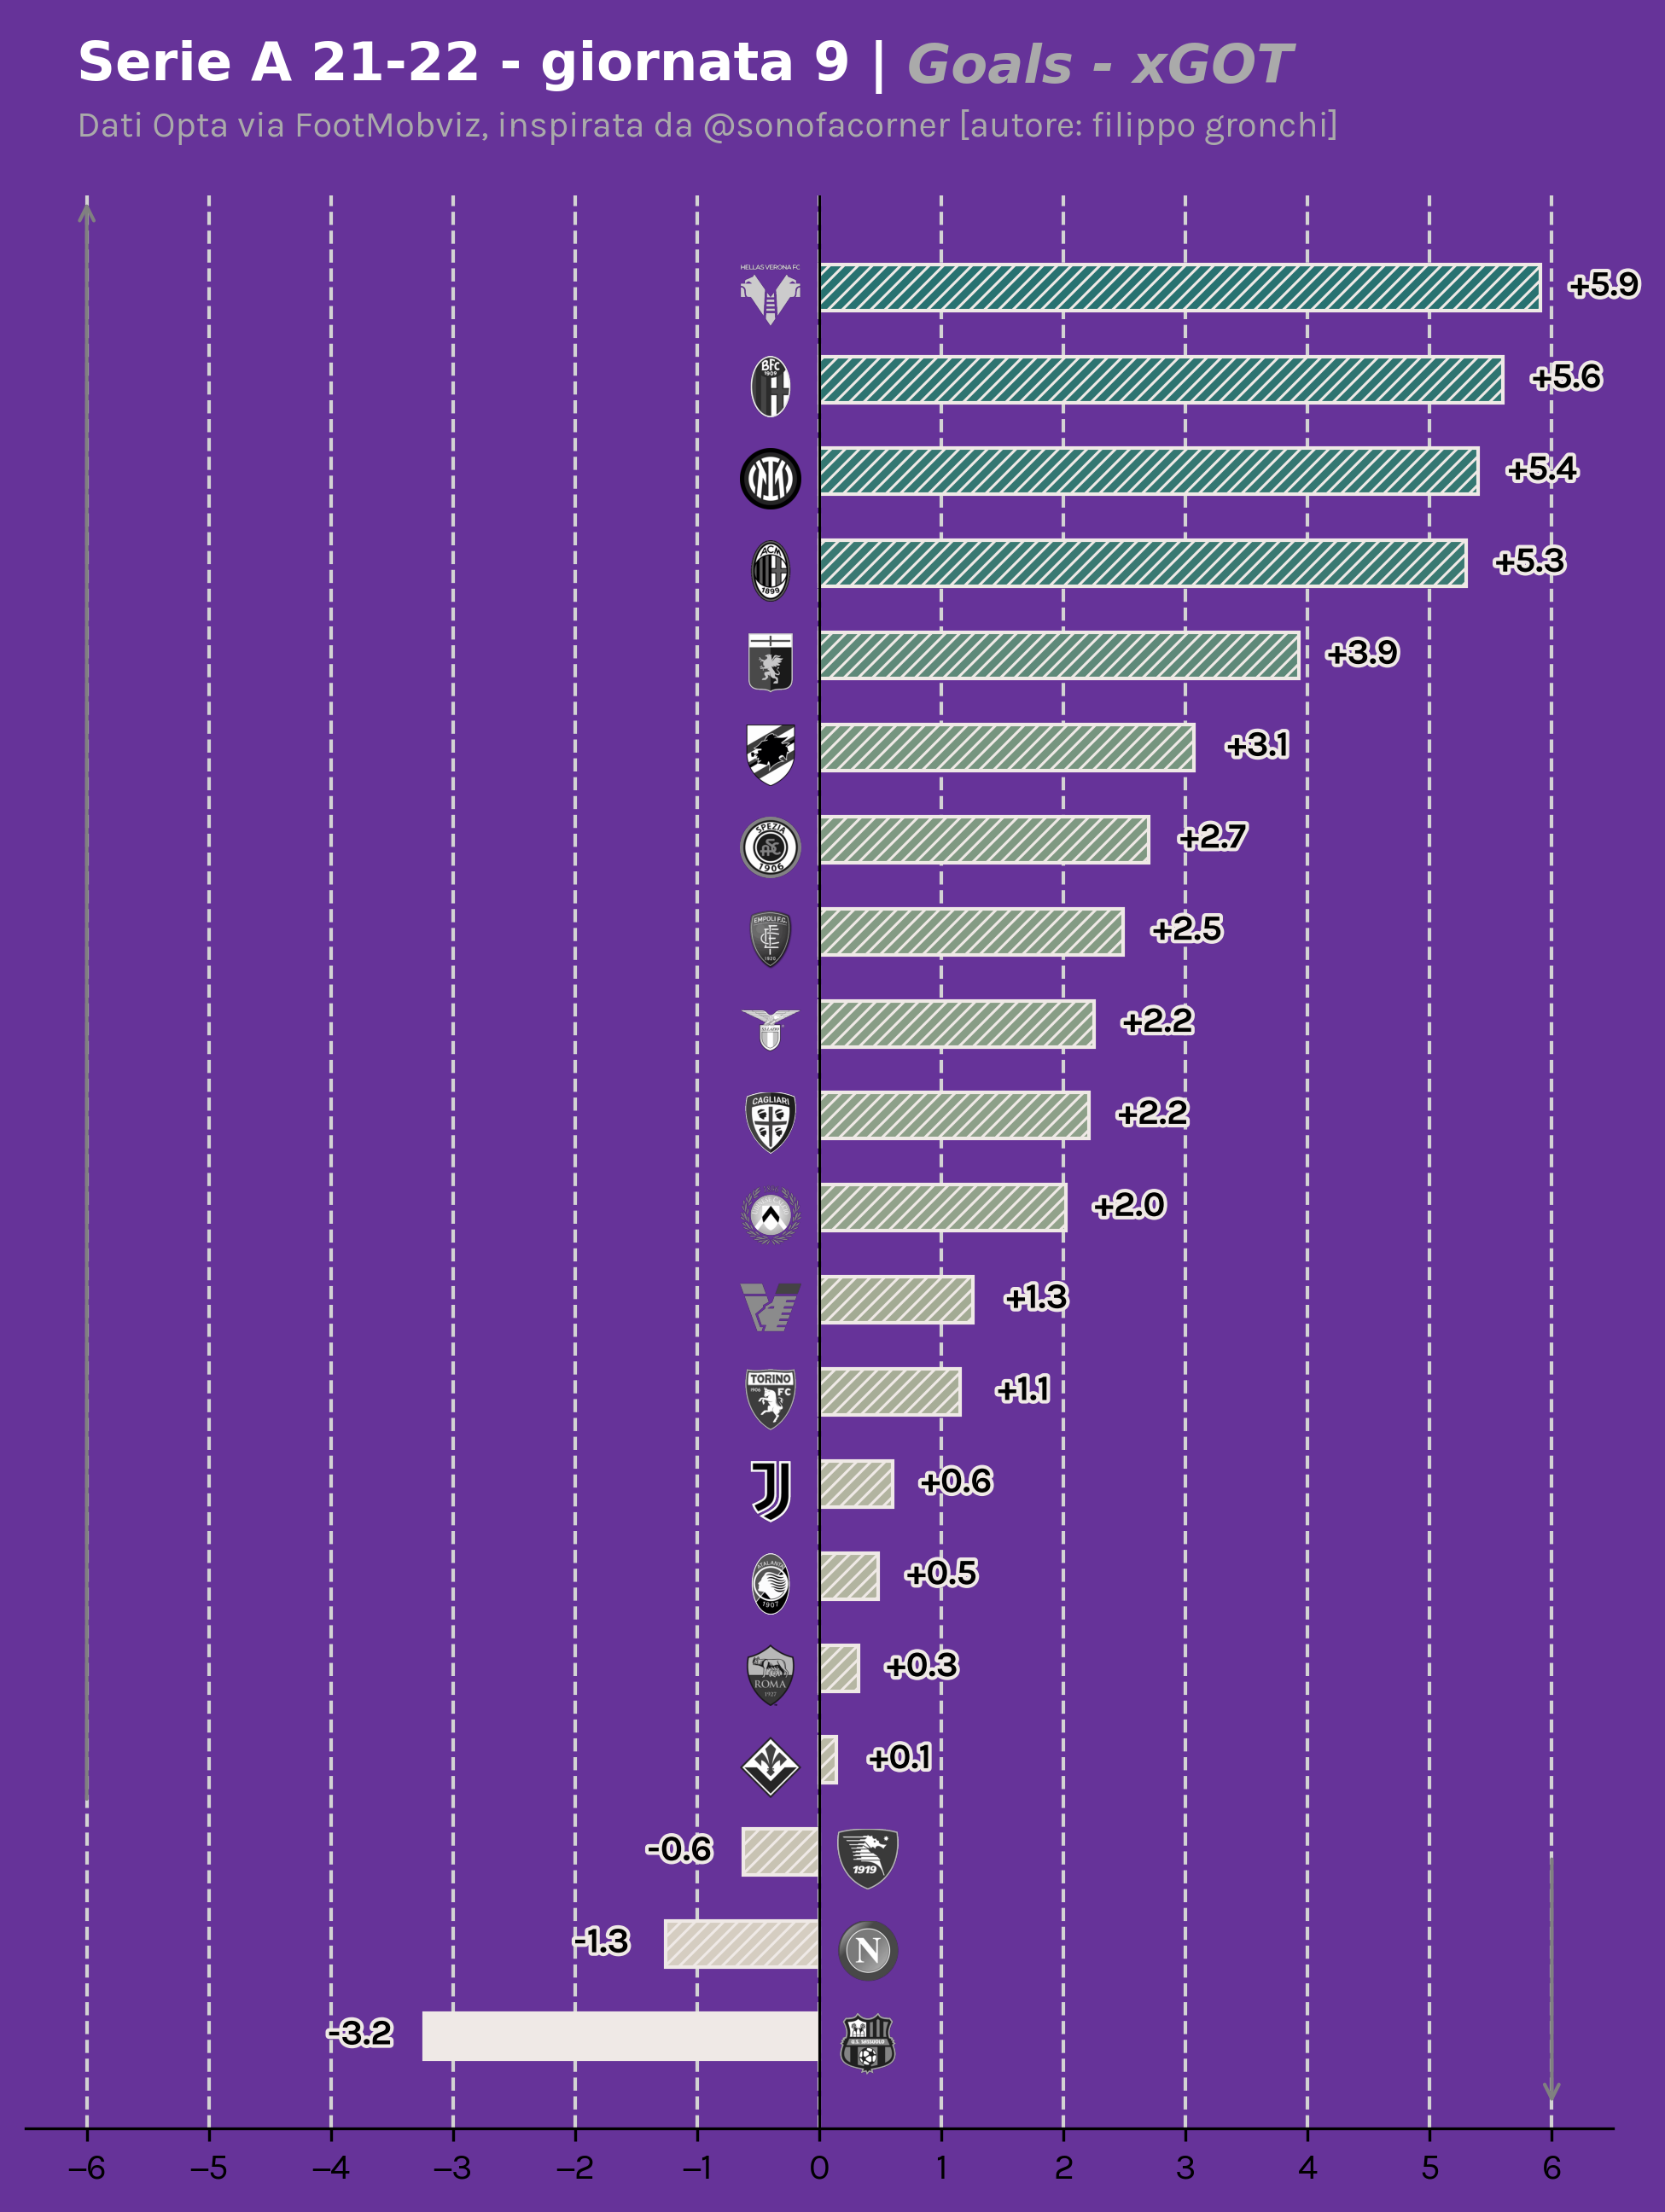

In [69]:
dataset = final_1.sort_values(by='goal-xGOT', ascending=True).reset_index(drop=True)
def add_logo_on_ax(ax, team_id, bw = True):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png')).convert('LA')
    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax


fig = plt.figure(figsize=(8,10), dpi=300, facecolor = "#663399")
ax = plt.subplot(facecolor = "#663399")
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(dataset['goal-xGOT'].min()), dataset['goal-xGOT'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, dataset.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax.set_xlabel('(PSxG-GA)/PSxG', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=dataset['goal-xGOT'].min(),vmax=dataset['goal-xGOT'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    dataset.index, dataset['goal-xGOT'],
    hatch='//////', ec='#efe9e6',
    color = cmap(norm(dataset['goal-xGOT'])), height=0.5,
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

for index, x in enumerate(dataset['goal-xGOT']):
    if x < 0:
        sign_offset = -1
        offset_logo = .15
        sign_text = ''
    else:
        sign_offset = 1
        offset_logo = .65
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*18,0),
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

    # -- Add the logo
    team_id = dataset['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, True)

#for index, row in dataset.iterrows():
#    if row['np:G-xG'] < 0:
#        sign_offset = +1
#        ha = 'left'
#    else:
#        sign_offset = -1
#        ha = 'right'
#    text_ = ax.annotate(
#        xy=(0, index),
#        xytext=(sign_offset*6,0),
#        #text=f'{row["Squad"]}',
#        text=f'{sign_text}{x:.1f}',
#        weight='bold',
#        ha=ha,
#        va='center',
#        textcoords='offset points'
#    )


    # -- Figure title and arrows --------------------------------
position_negative = dataset[dataset['goal-xGOT'] < 0].index.max()
position_x_negative = math.floor(-max_*(.85))
position_x_positive = math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2


fig_text(
    x = 0.15, y = .92, 
    s = "Serie A 21-22 - giornata 9 | <Goals - xGOT>",
    highlight_textprops=[{"color":"#aaaaaa", "style":"italic"}],
    va = 'bottom', ha = 'left',
    fontsize = 15, color = 'white', font = 'DM Sans', weight = 'bold'
)

subTitle =  "Dati Opta via FootMobviz, inspirata da @sonofacorner [autore: filippo gronchi]"
fig_text(
    x = 0.15, y = 0.9, 
    s = subTitle,
    va = 'bottom', ha = 'left',
    fontsize = 10, color = '#aaaaaa'
)

filenameStr = "../figures/squadre_serieA_2021_22_goal_xgot_giornata9.png"
plt.savefig(
	filenameStr,
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)